# How to Jupyter notebook
 - We can write **MarkDown** & **Python3** & something
 - Let's do that

In [1]:
print("hello")

hello


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import json

import chainer

import chainer.links as L
import chainer.functions  as F

from chainer import training
from chainer import optimizers
from chainer.training import extensions

import sys

plt.style.use('ggplot')

In [3]:
train, test = chainer.datasets.get_mnist()

In [4]:
def draw_digit(data,n):
    size = 28
    
    plt.subplot(10,10,n)

    X, Y = np.meshgrid(range(size),range(size))
    Z = np.reshape(data,(size,size))
    Z = Z[::-1,:]
    plt.xlim(0,size-1)
    plt.ylim(0,size-1)
    plt.pcolor(X, Y, Z)
    plt.gray()
    plt.tick_params(labelbottom="off")
    plt.tick_params(labelleft="off")

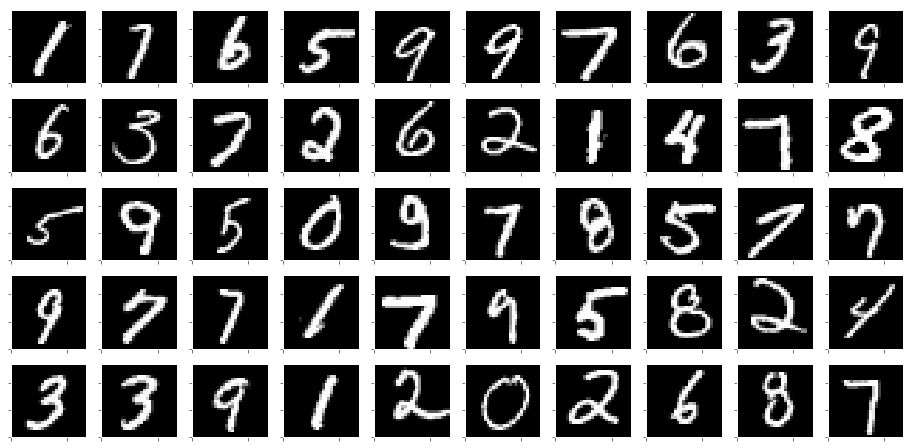

In [5]:
plt.figure(figsize=(16,16))

cnt = 1
for i in np.random.permutation(len(train))[:50]:
    draw_digit(train[i][0],cnt)
    cnt+=1
    
plt.show()

In [6]:
batchsize = 100
epoch = 20
units = 1000
gpu = -1 # GPUを使わない
choises = 10

In [7]:
class MnistModel(chainer.Chain):

    def __init__(self, n_units, n_out):
        super(MnistModel, self).__init__(
            l1=L.Linear(None, n_units),
            l2=L.Linear(None, n_units),
            l3=L.Linear(None, n_out),
        )

    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)

In [8]:
model = L.Classifier(MnistModel(units,choises))
optimizer = optimizers.Adam()
optimizer.setup(model)

In [9]:
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize,repeat=False, shuffle=False)

updater = training.StandardUpdater(train_iter, optimizer, device=gpu)
trainer = training.Trainer(updater, (epoch, 'epoch'), out='result')

trainer.extend(extensions.Evaluator(test_iter, model, device=gpu))

trainer.extend(extensions.snapshot(), trigger=(epoch, 'epoch'))
trainer.extend(extensions.LogReport())
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'validation/main/loss','main/accuracy', 'validation/main/accuracy']))

trainer.run()

epoch       main/loss   validation/main/loss  main/accuracy  validation/main/accuracy
1           0.189078    0.0887811             0.94315        0.9737                    
2           0.0752708   0.0800733             0.976817       0.9742                    
3           0.0480971   0.066144              0.984667       0.9793                    
4           0.034968    0.0661146             0.989183       0.9795                    
5           0.0270211   0.0727415             0.991267       0.9813                    
6           0.026275    0.0816798             0.991183       0.9777                    
7           0.0208589   0.0852068             0.992733       0.9764                    
8           0.017538    0.0901474             0.994017       0.9784                    
9           0.0163925   0.0782043             0.994983       0.982                     
10          0.0144349   0.0997209             0.99525        0.981                     
11          0.0152438   0.088418  

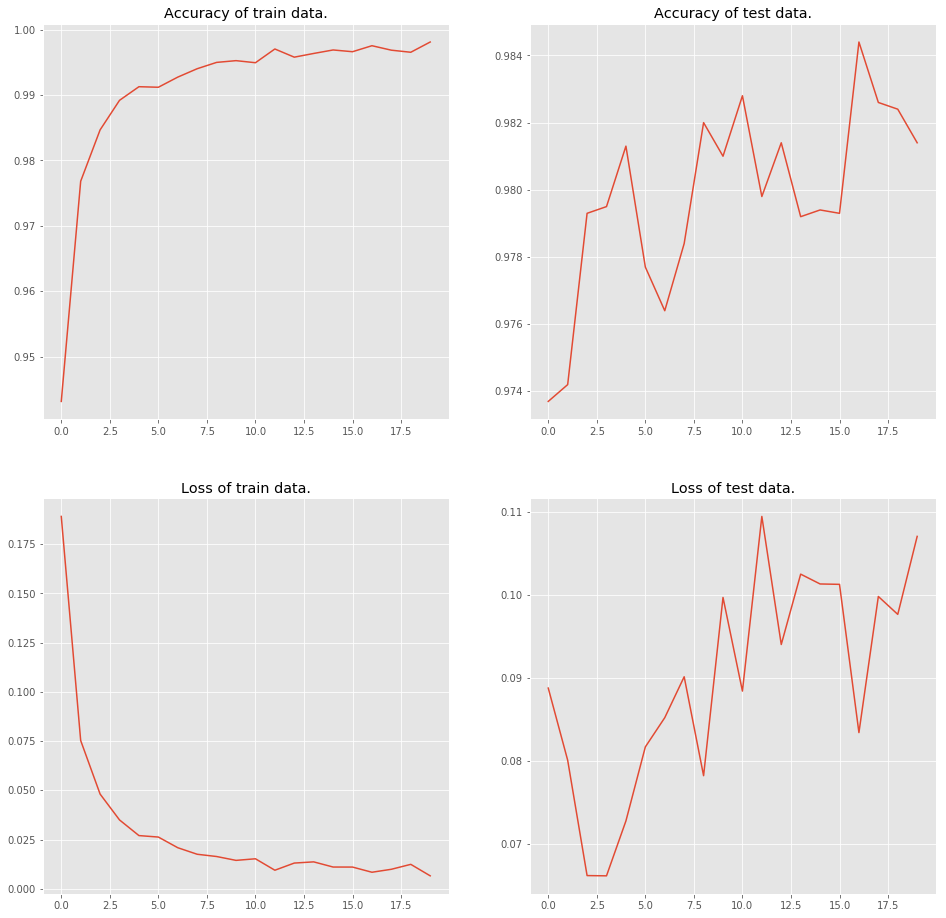

In [10]:
with open('result/log') as data_file:    
    data = json.load(data_file)
    
    plt.figure(figsize=(16,16))
    
    plt.subplot(2,2,1)
    plt.plot(range(len(data)), [d['main/accuracy'] for d in data])
    plt.title("Accuracy of train data.")
    
    plt.subplot(2,2,2)
    plt.plot(range(len(data)), [d['validation/main/accuracy'] for d in data])
    plt.title("Accuracy of test data.")
    
    plt.subplot(2,2,3)
    plt.plot(range(len(data)), [d['main/loss'] for d in data])
    plt.title("Loss of train data.")
    
    plt.subplot(2,2,4)
    plt.plot(range(len(data)), [d['validation/main/loss'] for d in data])
    plt.title("Loss of test data.")
    
    plt.show()

In [1]:
print("hallo jap")

hallo jap
